<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#目标站点分析" data-toc-modified-id="目标站点分析-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>目标站点分析</a></span></li><li><span><a href="#流程框架" data-toc-modified-id="流程框架-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>流程框架</a></span></li><li><span><a href="#Scrapy实战" data-toc-modified-id="Scrapy实战-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Scrapy实战</a></span><ul class="toc-item"><li><span><a href="#创建一个项目" data-toc-modified-id="创建一个项目-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>创建一个项目</a></span></li><li><span><a href="#创建一个spider" data-toc-modified-id="创建一个spider-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>创建一个spider</a></span></li><li><span><a href="#网页抓取" data-toc-modified-id="网页抓取-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>网页抓取</a></span><ul class="toc-item"><li><span><a href="#定义统一的数据结构" data-toc-modified-id="定义统一的数据结构-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>定义统一的数据结构</a></span></li><li><span><a href="#网页解析" data-toc-modified-id="网页解析-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>网页解析</a></span></li><li><span><a href="#测试" data-toc-modified-id="测试-3.3.3"><span class="toc-item-num">3.3.3&nbsp;&nbsp;</span>测试</a></span></li></ul></li><li><span><a href="#翻页并爬取其它页面信息" data-toc-modified-id="翻页并爬取其它页面信息-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>翻页并爬取其它页面信息</a></span></li><li><span><a href="#保存爬取到的信息" data-toc-modified-id="保存爬取到的信息-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>保存爬取到的信息</a></span></li></ul></li></ul></div>

Scrapy是一个非常强大的异步爬虫框架，它已经给我们写好了许许多多的组件，使用Scrapy我们只用关心爬虫的逻辑就好了。

## 目标站点分析

Scrapy提供了一个官方抓取网站：<a href="http://quotes.toscrape.com">http://quotes.toscrape.com </a>，
主要列出了一些名人名言，相应的作者和标签信息。

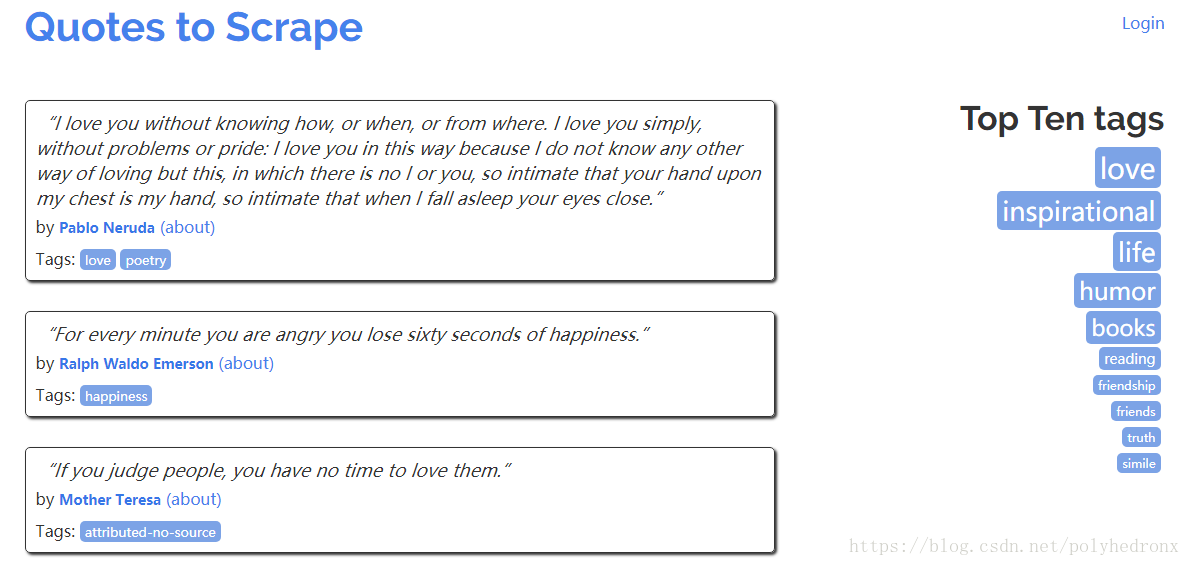

下拉到底点击“Next” 会进行翻页，URL变为“http://quotes.toscrape.com/page/2/”，
这是一个最简单的GET请求实例，通过改变链接的名称就可以进行翻页了，网页结构也非常简单，没有任何的反爬虫措施，所以就选用这一个站点作为Scrapy的入门实例。

## 流程框架

1.抓取第一页
请求第一页的URL并得到源代码，进行下一步的分析。

2.获取内容和下一页链接
分析源代码，提取首页内容，获取下一页链接等待进一步提取。

3.翻页爬取
请求下一页信息，分析内容并请求下一页链接。

4.保存爬取结果
将爬取结果保存为特定格式，如文本、数据库。

## Scrapy实战

### 创建一个项目

首先cd到项目目录下，输入“scrapy startproject quotetutorial”，即项目名为quotetutorial。

### 创建一个spider

按照提示，首先“cd quotetutorial”，接着用genspider创建一个spider：“scrapy genspider quotes quotes.toscrape.com”，其中“quotes”为spider名称，“quotes quotes.toscrape.com”是要爬取的URL。

现在我们就完成了spider的创建，实际上就是为我们创建了一个“quotes.py”文件，文件内容如下：

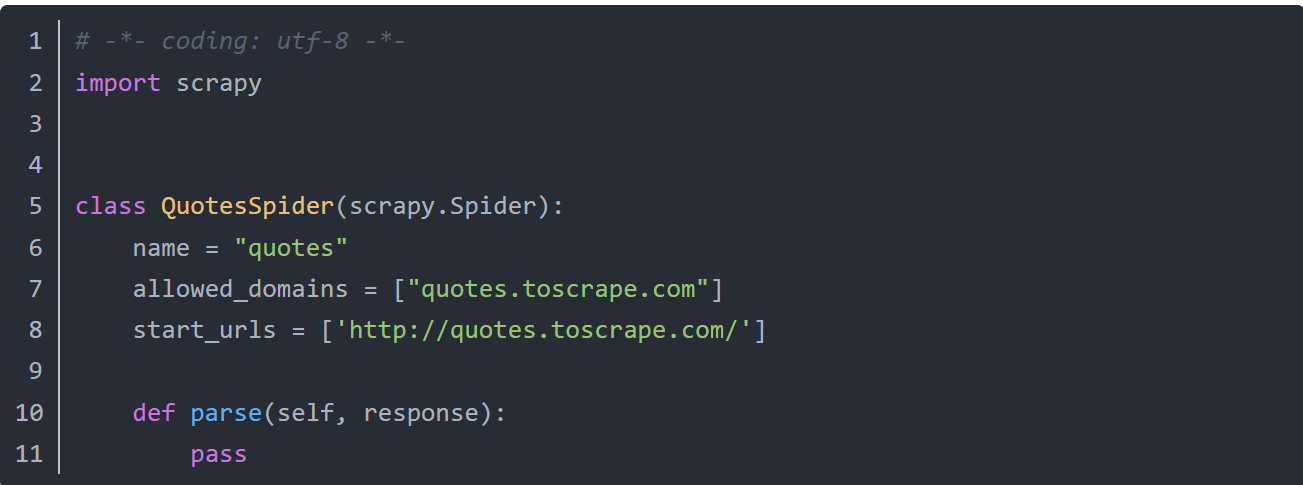

除此之外，我们可以看到还有以下文件：

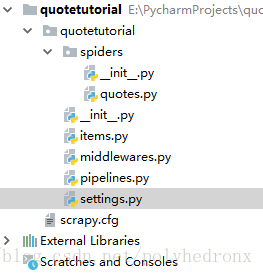

其中，“scrapy.cfg”为配置文件 ；
“items.py”是用来保存数据的数据结构；
“middlewares.py”是在爬取过程中定义的一些中间件，可以用来处理Request，Response以及Exceptions等操作，也可以用来修改Request, Response等相关的配置；
“pipelines.py”即项目管道，可以用来输出一些items；
另外，最重要的就是“settings.py”，里面定义了许多配置信息。
最主要的运行代码是在“quotes.py”里面。

首先在命令行运行一下“scrapy crawl quotes”，回车之后控制台输出了一些调试信息。可以看出，它和普通的爬虫不太一样，Scrapy提供了很多额外的输出。

这么看这个爬虫似乎没有输出我们想要的那种信息，将“quotes.py”文件改写之后再运行：

In [ ]:
# -*- coding: utf-8 -*-
import scrapy
 
 
class QuotesSpider(scrapy.Spider):
    name = "quotes"
    allowed_domains = ["quotes.toscrape.com"]
    start_urls = ['http://quotes.toscrape.com/']
 
    def parse(self, response):
        print(response.text)

上面文件中的parse方法，是请求文件之后默认调用的一个方法，我们在这里可以打印出请求的响应内容。

parse方法实际上就是一个默认的回调，在爬虫启动的时候会首先请求start_urls里的链接，然后会自动调用parse方法进行解析。

### 网页抓取

接下来，我们看一下该怎么抓取这个网页。

网页结构很简单，看下图便一目了然。class="text"包含了句子内容，class="author"包含了作者信息，class="tags"包含了标签信息，它们都包含在class="quote"的一个div标签里。

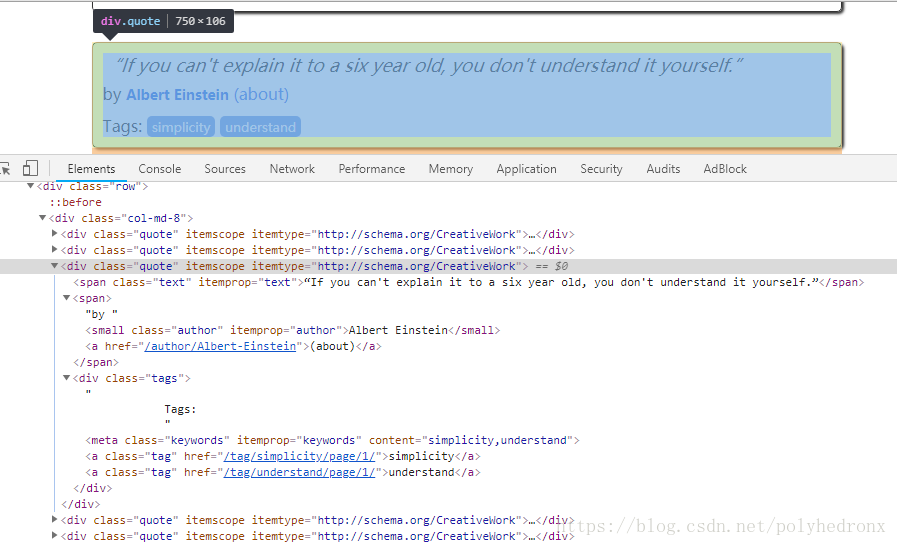

#### 定义统一的数据结构

借助Scrapy提供的“items.py”定义统一的数据结构，指定一些字段之类的，将爬取到的结果作为一个个整体存下来。根据提示更改文件如下：

In [ ]:

# -*- coding: utf-8 -*-
 
# Define here the models for your scraped items
#
# See documentation in:
# http://doc.scrapy.org/en/latest/topics/items.html
 
import scrapy
 
 
class QuoteItem(scrapy.Item):
    # define the fields for your item here like:
    # name = scrapy.Field()
    text = scrapy.Field()
    author = scrapy.Field()
    tags = scrapy.Field()

为了将字段进行完整的格式化，Scrapy为我们提供了Item类，这些Item类可以让我们自己来指定字段。比方说在我们这个Scrapy爬虫项目中，我们定义了一个Item类，这个Item里边包含了title、release_date、url等，这样的话通过各种爬取方法爬取过来的字段，再通过Item类进行实例化，这样的话就不容易出错了，因为我们在一个地方统一定义过了字段，而且这个字段具有唯一性。

这个Item有些类似我们常说的字典，但是它的功能要比字典更加齐全一些。同时当我们对Item进行实例化之后，在Spider爬虫主体文件里边，我们通过parse()函数获取到目标字段的Item类，我们直接将这个类进行yield即可，然后Scrapy在发现这是Item类的一个实例之后，它就会直接将这个Item载入pipeline中去。这样的话，我们就可以直接在pipeline中进行数据的保存、去重等操作。以上就是Item带给我们的好处。

#### 网页解析

接下来在parse方法里面写一下解析的方法：

In [ ]:
def parse(self, response):
    quotes = response.css('.quote')
    for quote in quotes:
        text = quote.css('.text::text').extract_first()
        author = quote.css('.author::text').extract_first()
        tags = quote.css('.tags .tag::text').extract()

解析方法和pyquery非常相似，“.text”指的是标签的class，“::text”是Scrapy特有的语法结构，表示输出标签里面的文本内容，“extract_first()”方法表示获取第一个内容，而“extract”会把所有结果都找出来（类似于find和findall）。


Python爬虫CSS选择器：https://blog.csdn.net/Hubz131/article/details/88857643
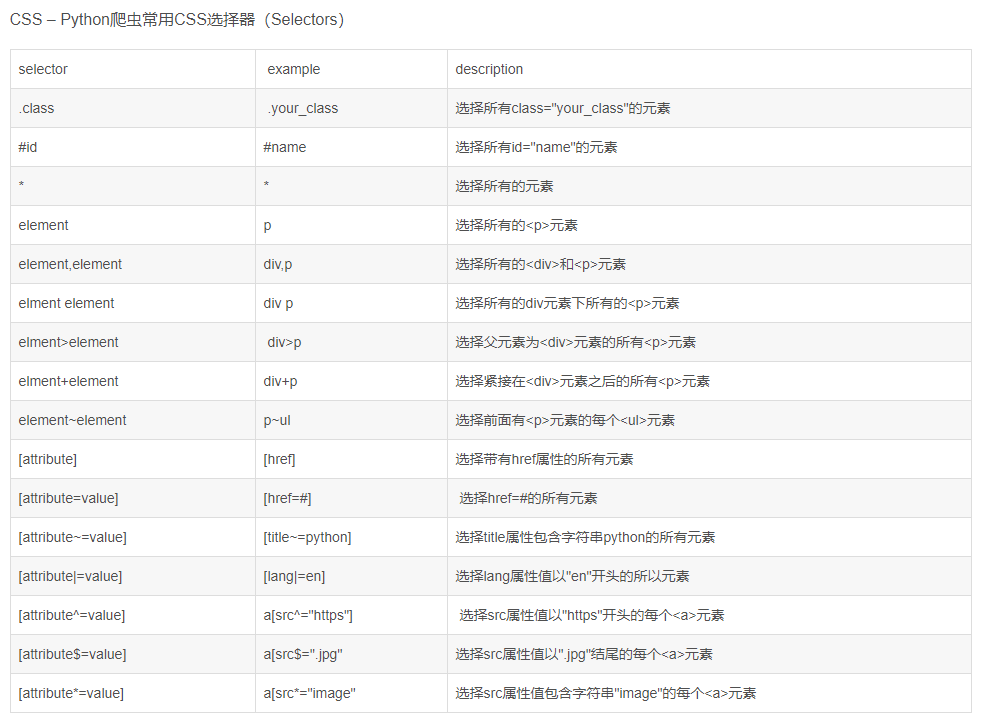

Scrapy还为我们提供了一个非常强大的工具--shell，直接输入“scrapy shell quotes.toscrape.com”就可以进入命令行交互模式：

在此模式可以进行一些相应的调试，比如输入“response”就会有一个输出结果：

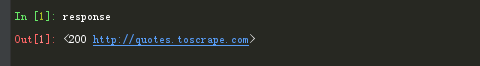

#### 测试

我们可以来测试一下刚刚写的方法的效果，先查看“response.css(’.quote’)”的输出：

In [ ]:
response.css('.quote')

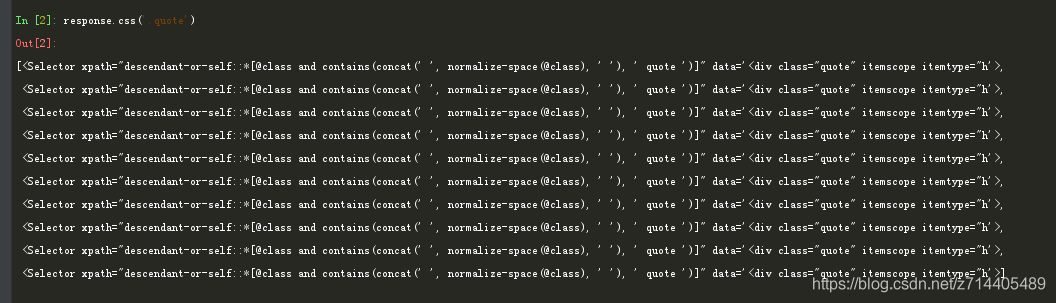

这是一个list类型的数据，里面的内容是Selector选择器，查看第一个结果：

此时若直接输入quotes会报错

先执行quotes = response.css('.quote')

然后quotes[0]

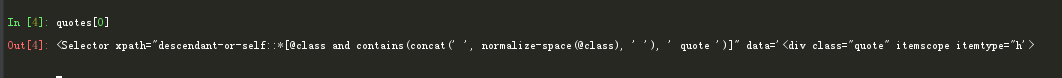

继续使用css选择器选择class为text的部分，可以看到结果也是一个list，内容只有一个，也是一个Selector。

In [ ]:
quotes[0].css('.text')

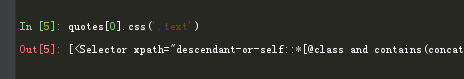

使用“::text”会有什么不同呢？让我们来看一下：

In [ ]:
quotes[0].css('.text::text')

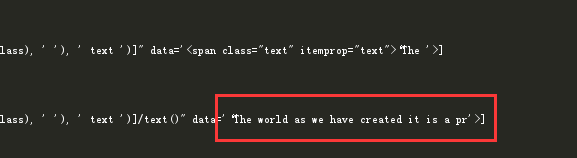

可以看到，不同之处是里面的data变成了字符串格式的数据，而不带“::text”获取到的是整个标签的内容。

再加上extract()会发生什么呢？

In [ ]:
quotes[0].css('.text::text').extract()

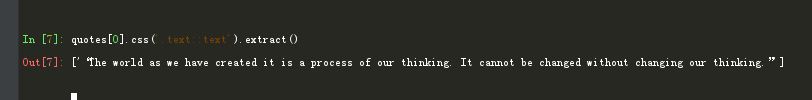

返回的依然是list，长度为1，内容是一个字符串。如果去掉“::text”，则返回的是内容为标签的list，如下。也就是说，使用extract()，是把原来Selector中的data单独提取了出来。

我们再看看extract_first()。可以猜到，使用extract_first()获取到的应该是原来list中的第一个值，也就是说，现在返回的应该是一个字符串，而不再是一个列表了。

In [9]: quotes[0].css('.text::text').extract_first()
Out[9]: '“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”'

而class为tags的标签就不一样了，里面包含了可能不止一个元素，如下，我们获取到的就是一个包含了多个元素的list。使用extract_fist()依然可以获取list中的第一个元素。

In [10]: quotes[0].css('.tags .tag::text').extract()
Out[10]: ['change', 'deep-thoughts', 'thinking', 'world']

In [11]: quotes[0].css('.tags .tag::text').extract_first()
Out[11]: 'change'

接下来我们要在parse方法中调用我们刚才定义的items，将提取出的网页信息存储到item，然后调用yield方法将item生成出来。

 for quote in quotes:
            item = QuoteItem()
            text = quote.css('.text::text').extract_first()
            author = quote.css('.author::text').extract_first()
            tags = quote.css('.tags .tag::text').extract()
            item['text'] = text
            item['author'] = author
            item['tags'] = tags
            yield item

注意上面要import一下：

from quotetutorial.items import QuoteItem

再次运行，就可以在调试信息中看到我们要获取到的内容了

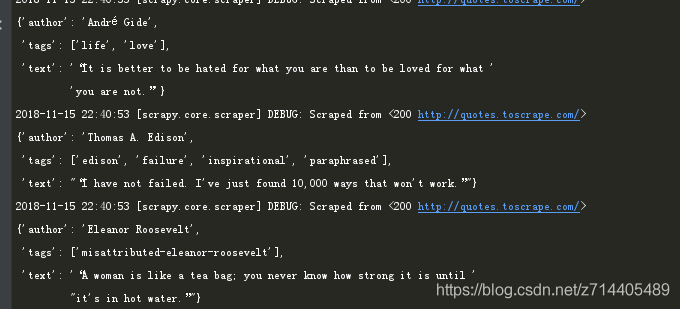

### 翻页并爬取其它页面信息

由于网页的请求方式非常简单，比如第二页就是“http://quotes.toscrape.com/page/2/”

请求其它页只要将“2”替换成对应数字即可。在页面底端点击“Next”也可以切换到下一页，这是因为“Next”对应着下一页的超链接，同样地，我们可以从网页源代码中提取出这个超链接。

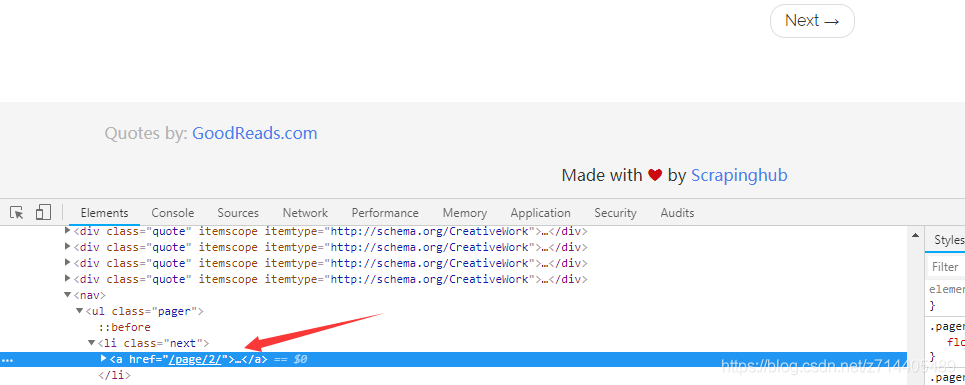

In [ ]:
def parse(self, response):
        quotes = response.css('.quote')

        for quote in quotes:
            item = QuoteItem()
            text = quote.css('.text::text').extract_first()
            author = quote.css('.author::text').extract_first()
            tags = quote.css('.tags .tag::text').extract()
            item['text'] = text
            item['author'] = author
            item['tags'] = tags
            yield item

        next = response.css('.pager .next a::attr(href)').extract_first()
        url = response.urljoin(next)
        yield scrapy.Request(url=url, callback=self.parse)

urljoin方法是为了拼凑出完整的url——我们获取到的“next”只是类似于“/page/3/”这样。

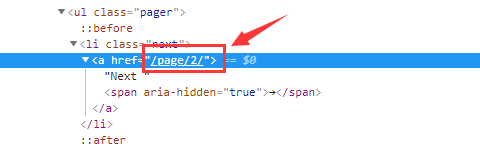

最后调用Request，第一个参数就是要请求的url，第二个参数“callback”是回调函数的意思，也就是请求之后得到的response由谁来处理，这里我们还是调用parse，因为parse方法就是用来处理索引页的，这就相当于完成了一个递归的调用，可以一直不断地调用parse方法获取下一页的链接并对访问得到的信息进行处理。

再次重新运行程序，可以看到输出了所有页的内容。

### 保存爬取到的信息

如何把抓取到的信息保存下来呢？

In [ ]:
scrapy crawl quotes -o quotes.json

In [ ]:
scrapy crawl quotes -o quotes.csv